# NEVADA Airbnb Analysis

### The Clark County, Nevada, USA Airbnb Open Dataset is chosen from http://insideairbnb.com/get-the-data/  
### The analysis is for the UDACITY Project: Write a Data Science Blog Post

The 6 steps of CRISP-DM  
(**Cr**oss-**I**ndustry **S**tandard **P**rocess for **D**ata **M**ining):

1.0 Business Understanding  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   2.0 Data Understading  
3.0 Data Preperation        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   4.0 Modelling  
5.0 Evaluation              &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   6.0 Deployment  

The Summary at the bottom tries to investigate the following 3 questions.  
a) How is the median price change with different types of housing available?  
b) Which area of the Clark County median price is the lowest?  
c) In the area the median price is lower, how the price fluctuates throughout the year?  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":8,"axes.labelsize":30})   

### Gather Dataset

The repository includes 3 CSV files and following 2 files were used in the analysis below.  
**calendar.csv** : The pricing for each listing id for certain days.  
**listings.csv** : detailed description of each listing id.   

In [3]:
# http://insideairbnb.com/get-the-data/
listings_df = pd.read_csv('data/listings.csv')
calendar_df = pd.read_csv('data/calendar.csv')

In [4]:
# shape of the data sets
print(f'\n Number of:    Rows     Columns \n Listings:     {listings_df.shape[0]}    {listings_df.shape[1]} \n \
Calander:   {calendar_df.shape[0]}    {calendar_df.shape[1]} ')


 Number of:    Rows     Columns 
 Listings:     11791    74 
 Calander:   4303715    7 


In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11791 entries, 0 to 11790
Data columns (total 74 columns):
id                                              11791 non-null int64
listing_url                                     11791 non-null object
scrape_id                                       11791 non-null int64
last_scraped                                    11791 non-null object
name                                            11791 non-null object
description                                     11363 non-null object
neighborhood_overview                           6763 non-null object
picture_url                                     11791 non-null object
host_id                                         11791 non-null int64
host_url                                        11791 non-null object
host_name                                       11375 non-null object
host_since                                      11375 non-null object
host_location                                   11358 n

In [6]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303715 entries, 0 to 4303714
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 229.8+ MB


## 3. Handle Missing data and Categorical Data

## Figure 1

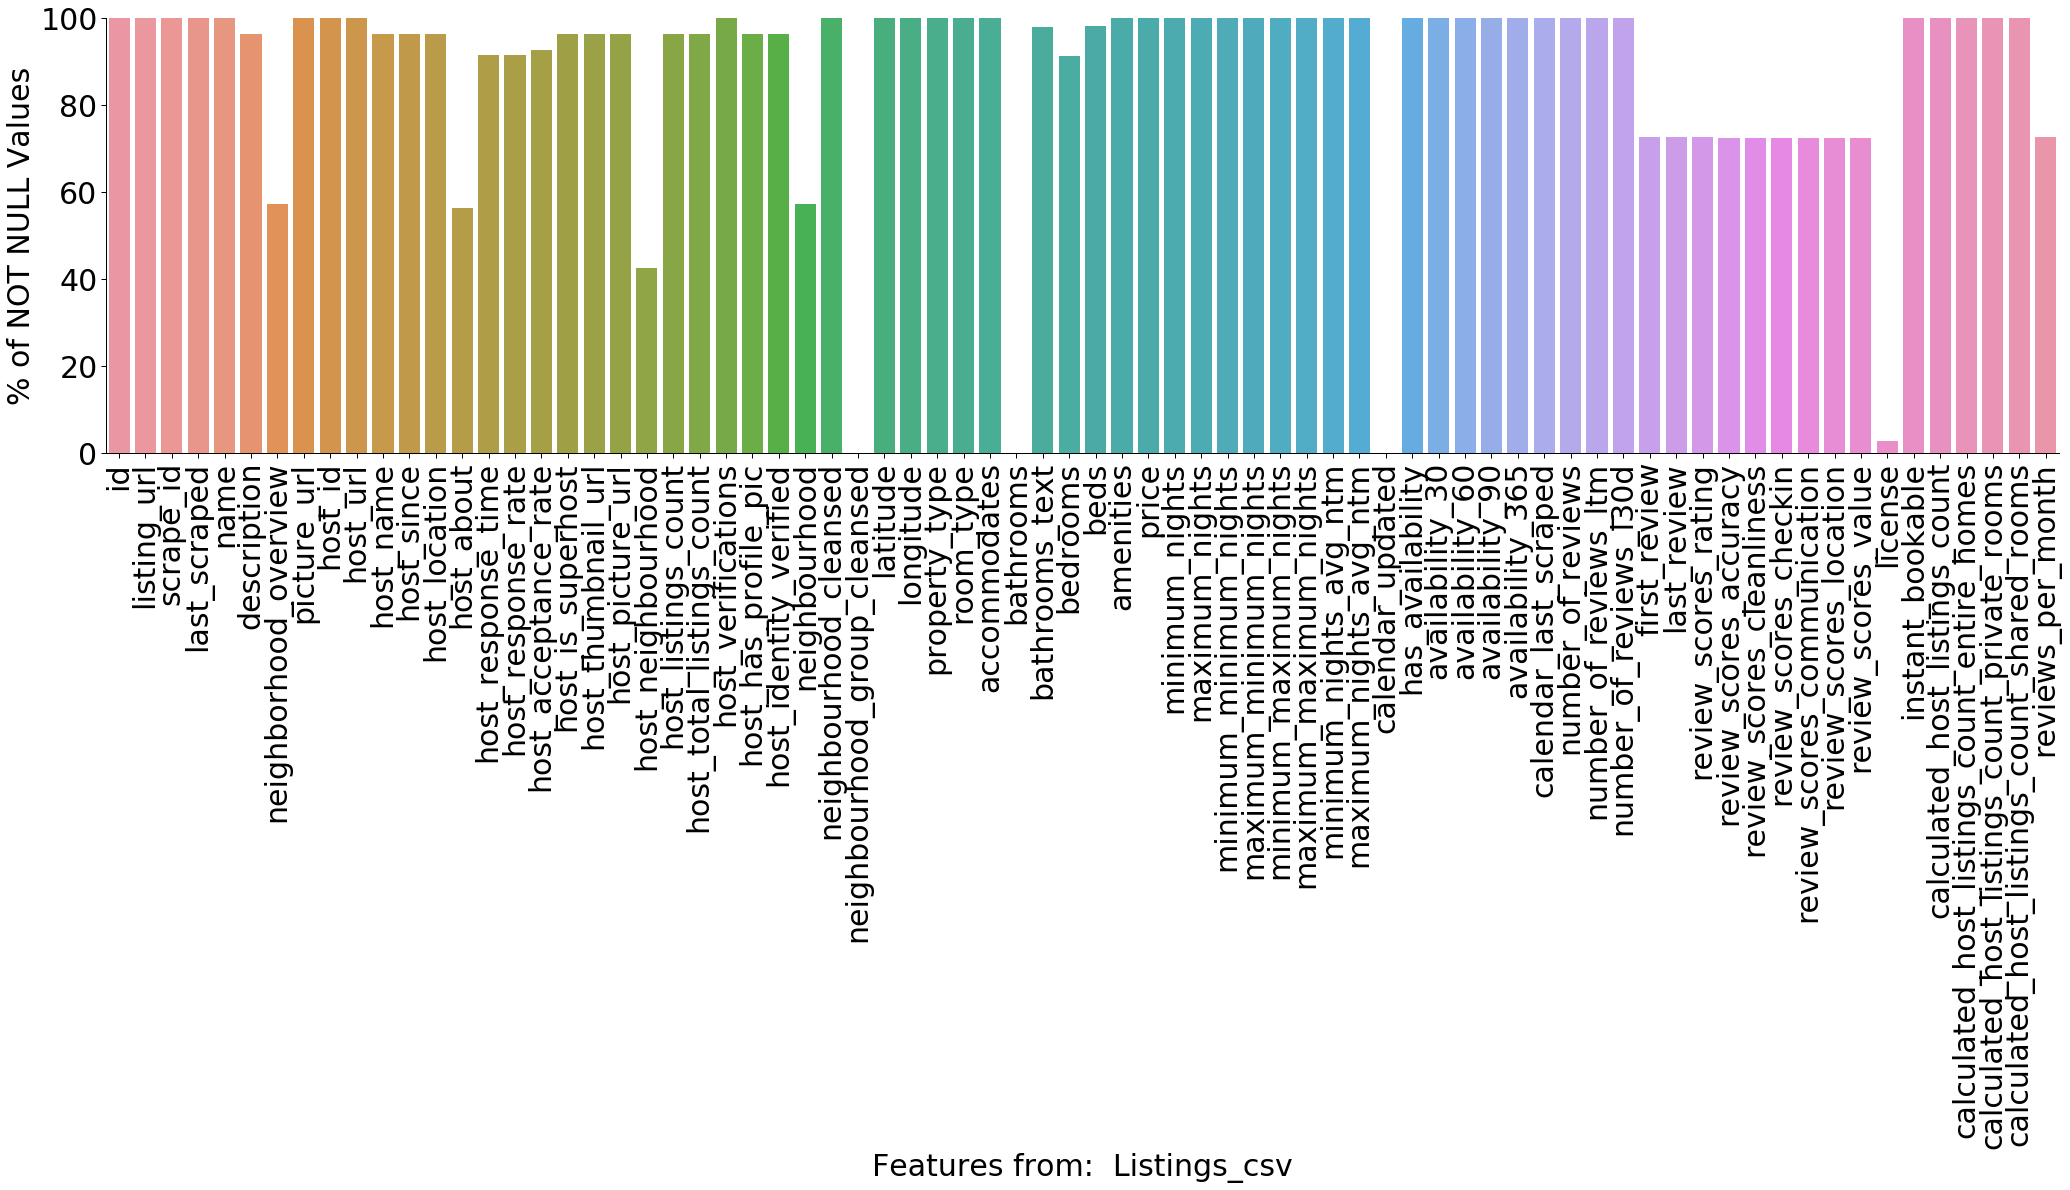

In [7]:
listing_null = ((listings_df.notnull().mean())*100).to_frame().reset_index()
listing_null.columns = ['index', 'prece']

plt.figure(figsize=(35,8))
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0,100)
ax = sns.barplot(x='index', y='prece', data=listing_null)
sns.despine()
ax.set_xlabel('Features from:  Listings_csv', fontsize=30)
ax.set_ylabel('% of NOT NULL Values', fontsize=30)

#plt.tight_layout()
plt.savefig('Fig_1.png', bbox_inches='tight')
plt.show()


## Figure 2

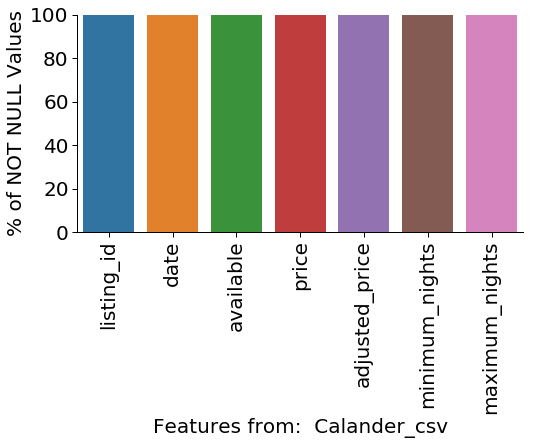

In [8]:
calander_null = ((calendar_df.notnull().mean())*100).to_frame()
calander_null = calander_null.reset_index()
calander_null.columns = ['index', 'prece']

plt.figure(figsize=(8,4))
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,100)
ax = sns.barplot(x='index', y='prece', data=calander_null)
sns.despine()
ax.set_xlabel('Features from:  Calander_csv', fontsize=20)
ax.set_ylabel('% of NOT NULL Values', fontsize=20)
#plt.tight_layout()
#plt.savefig('Fig_2.png', bbox_inches='tight')
plt.show()

Looks like in the **Listings_csv** dataset neighbourhood_group_cleansed, bathrooms, calendar_updated columns all rows are NULL.  
Therefore, we can ignore and drop these 3 columns.   
The feature we are interested 'Price' does not include any rows with Null values.  

In [9]:
# Remove the $ sign from the calendar_df.price. column
calendar_df['price_US_dollars'] = calendar_df.price.replace({'[\$,]':''}, regex=True).astype(float)

In [10]:
# Extract month with year
calendar_df['month_year'] = pd.to_datetime(calendar_df['date']).dt.to_period('M')

### Need to merge "['neighbourhood_cleansed', 'property_type', 'room_type', 'bedrooms', 'beds', 'bathrooms_text', 'number_of_reviews']" from listings_df with the calander_df 

In [11]:
### Create joined dataframe with listings_df and calander_df
calander_neighborhood_df = calendar_df.merge(listings_df[['neighbourhood_cleansed', 'property_type', 'room_type', 'bedrooms', 'beds', 'bathrooms_text', 'number_of_reviews']], how='left', left_on=calendar_df['listing_id'], right_on=listings_df['id'] )
calander_neighborhood_df.head() 

,key_0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_US_dollars,month_year,neighbourhood_cleansed,property_type,room_type,bedrooms,beds,bathrooms_text,number_of_reviews
0,27082775,27082775,2021-12-18,f,$36.00,$36.00,31,1125,36.0,2021-12,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
1,26373705,26373705,2021-12-18,f,$121.00,$121.00,1,28,121.0,2021-12,Unincorporated Areas,Room in hotel,Private room,NaN,1.0,1 bath,63
2,26373705,26373705,2021-12-19,t,$99.00,$99.00,1,28,99.0,2021-12,Unincorporated Areas,Room in hotel,Private room,NaN,1.0,1 bath,63
3,26373705,26373705,2021-12-20,t,$99.00,$99.00,1,28,99.0,2021-12,Unincorporated Areas,Room in hotel,Private room,NaN,1.0,1 bath,63
4,27082775,27082775,2021-12-19,f,$36.00,$36.00,31,1125,36.0,2021-12,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3


### Check for NaN values in the created new dataframe.
### Calculate the precentage of not null values for each column.

In [12]:
listing_null = ((calander_neighborhood_df.notnull().mean())*100).to_frame().reset_index()
listing_null.columns = ['index', '% Not Null']
listing_null

,index,% Not Null
0,key_0,100.000000
1,listing_id,100.000000
2,date,100.000000
3,available,100.000000
4,price,99.995701
5,adjusted_price,99.995701
6,minimum_nights,100.000000
7,maximum_nights,100.000000
8,price_US_dollars,99.995701
9,month_year,100.000000


### Remove NaN values and verify don't have any in each column

In [13]:
calander_neighborhood_df = calander_neighborhood_df.dropna()

listing_null = ((calander_neighborhood_df.notnull().mean())*100).to_frame().reset_index()
listing_null.columns = ['index', '% Not Null']
listing_null

,index,% Not Null
0,key_0,100.0
1,listing_id,100.0
2,date,100.0
3,available,100.0
4,price,100.0
5,adjusted_price,100.0
6,minimum_nights,100.0
7,maximum_nights,100.0
8,price_US_dollars,100.0
9,month_year,100.0


### Get only records with 'available' feature set to 'True'

In [14]:
### get only records with 'available=T'
combined_availa_T_df = calander_neighborhood_df[calander_neighborhood_df.available=='t']
len(combined_availa_T_df)

1848354

In [15]:
combined_availa_T_df.describe()

,key_0,listing_id,minimum_nights,maximum_nights,price_US_dollars,bedrooms,beds,number_of_reviews
count,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06
mean,4.043884e+07,4.043884e+07,9.215325e+00,4.166563e+05,3.395243e+02,2.132894e+00,3.117386e+00,2.431061e+01
std,1.391196e+07,1.391196e+07,1.959674e+01,2.988386e+07,8.263365e+02,1.447292e+00,2.512528e+00,5.205227e+01
min,4.449500e+04,4.449500e+04,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.169696e+07,3.169696e+07,2.000000e+00,1.820000e+02,9.900000e+01,1.000000e+00,1.000000e+00,0.000000e+00
50%,4.579130e+07,4.579130e+07,2.000000e+00,1.125000e+03,1.900000e+02,2.000000e+00,2.000000e+00,4.000000e+00
75%,5.185580e+07,5.185580e+07,5.000000e+00,1.125000e+03,3.310000e+02,3.000000e+00,4.000000e+00,2.200000e+01
max,5.387990e+07,5.387990e+07,3.650000e+02,2.147484e+09,2.500000e+04,1.600000e+01,2.700000e+01,6.690000e+02


In [16]:
combined_availa_T_df.head()

,key_0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_US_dollars,month_year,neighbourhood_cleansed,property_type,room_type,bedrooms,beds,bathrooms_text,number_of_reviews
183,27082775,27082775,2022-02-05,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
184,27082775,27082775,2022-02-06,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
185,27082775,27082775,2022-02-07,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
186,27082775,27082775,2022-02-08,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
187,27082775,27082775,2022-02-09,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3


## Figure 3

/Users/nn34/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


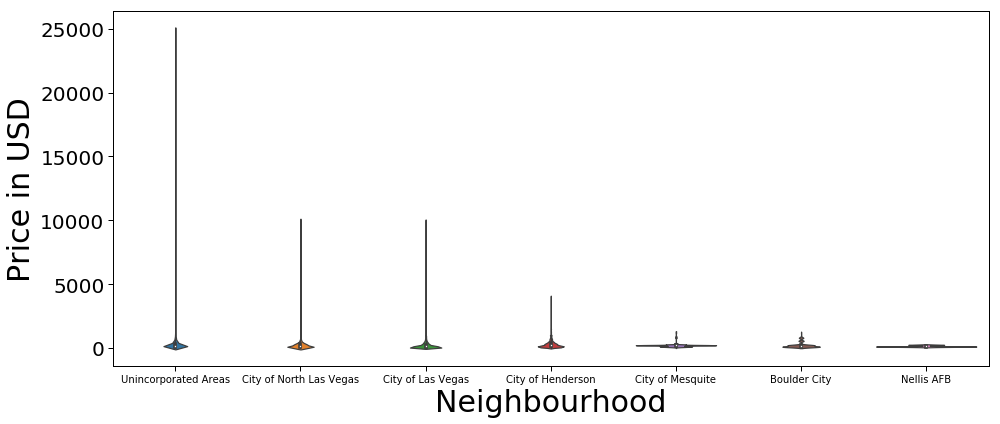

In [17]:
plt.figure(figsize=(14,6))
ax = sns.violinplot(y="price_US_dollars", x="neighbourhood_cleansed", data=combined_availa_T_df, annot_kws={"size": 20},)
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

plt.tight_layout()
# plt.xlabel(fontsize = 20)
# plt.ylabel(fontsize = 20)
#plt.savefig('Fig_3.png', bbox_inches='tight')
plt.show()

In [18]:
print(f' The mean value of the feature :price_US_dollars in the DataFrame = {combined_availa_T_df["price_US_dollars"].mean():.2f}')

 The mean value of the feature :price_US_dollars in the DataFrame = 339.52


## Figure 4

/Users/nn34/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


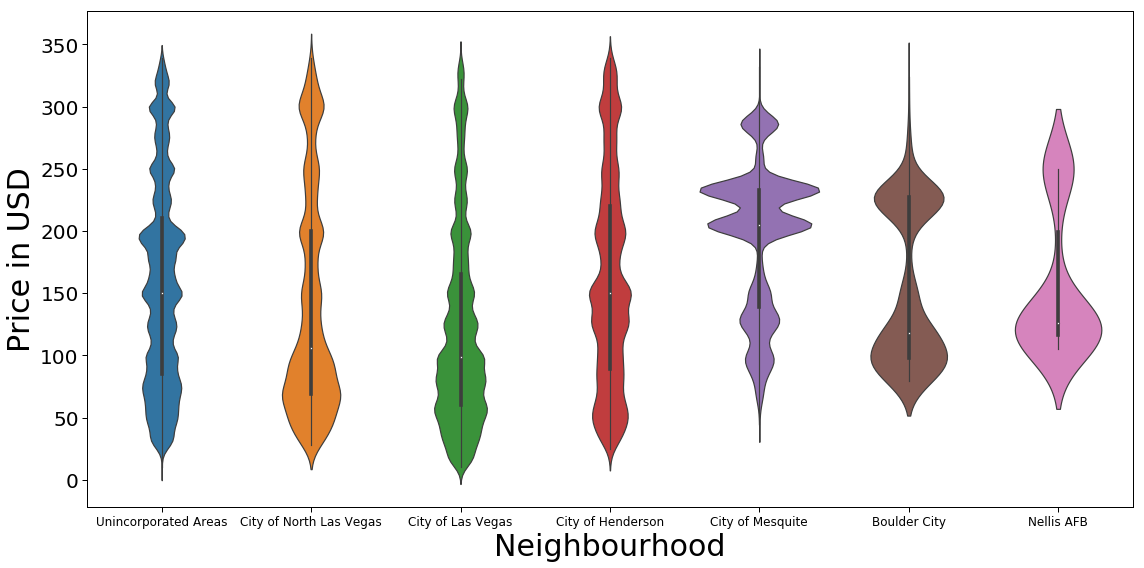

In [19]:
plt.figure(figsize=(16,8))
less_mean_df = combined_availa_T_df[combined_availa_T_df["price_US_dollars"] <= combined_availa_T_df["price_US_dollars"].mean()]
ax = sns.violinplot(y="price_US_dollars", x="neighbourhood_cleansed", data=less_mean_df)
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

plt.tight_layout()
# plt.xlabel(fontsize
#plt.savefig('Fig_4.png', bbox_inches='tight')
plt.show()

## Figure 5

/Users/nn34/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


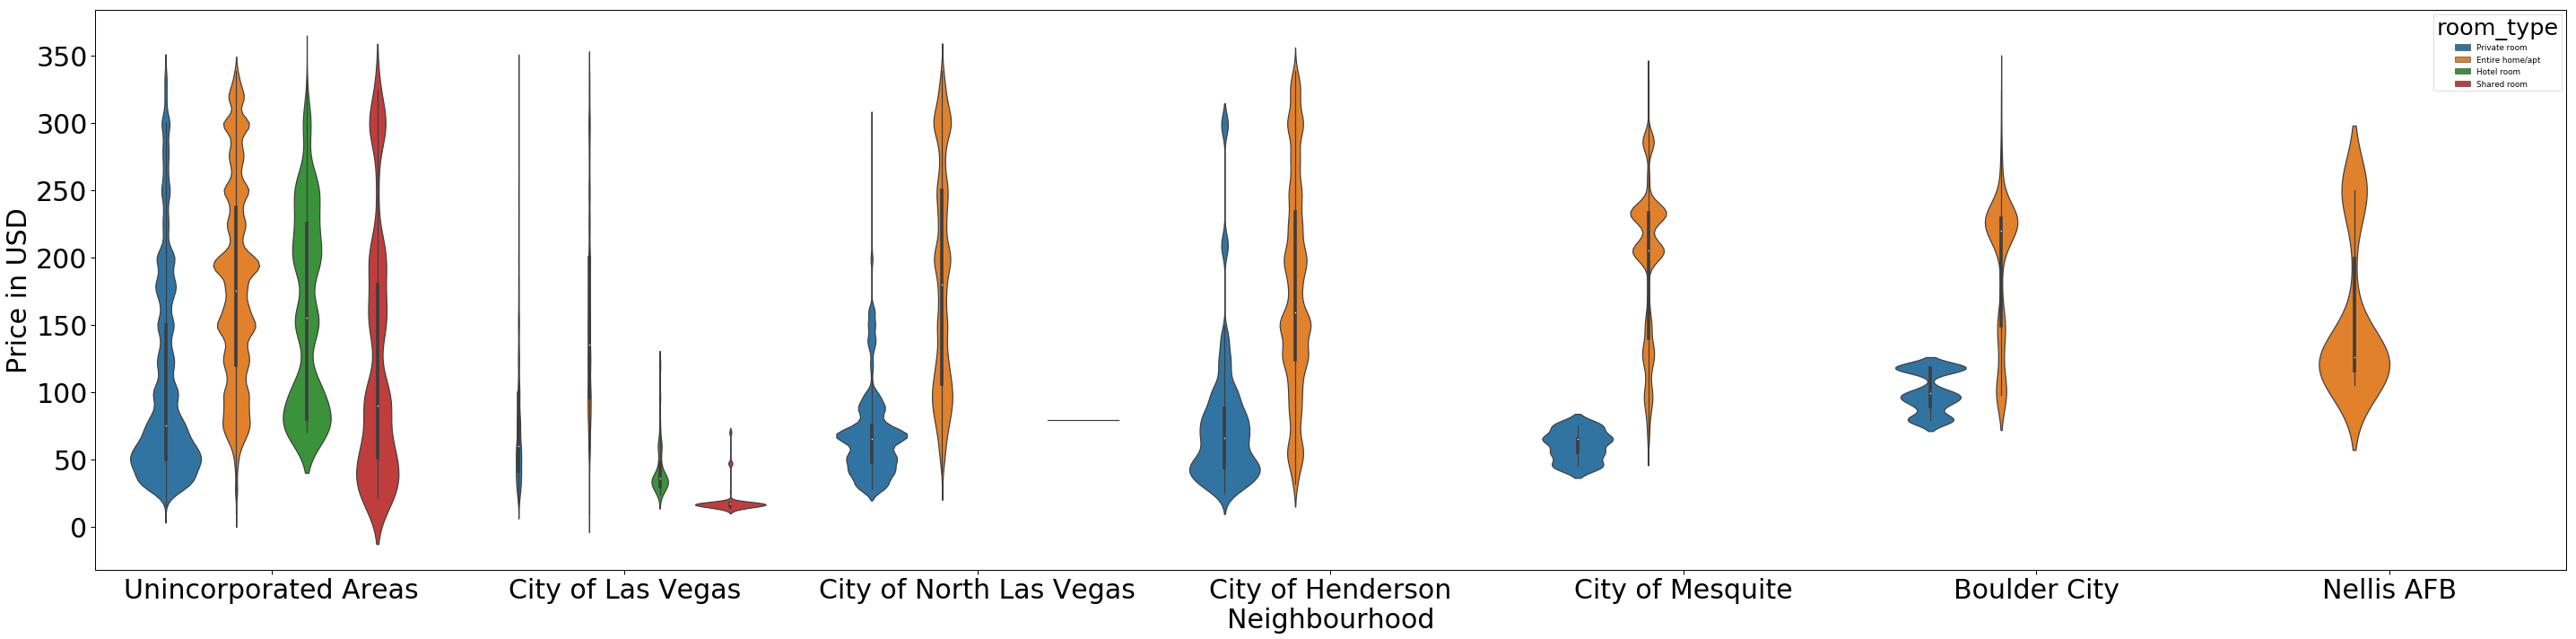

In [20]:
plt.figure(figsize=(40,10))
#less_mean_df = combined_availa_T_df[combined_availa_T_df["price_US_dollars"] <= combined_availa_T_df["price_US_dollars"].mean()]
sort_bath = less_mean_df.sort_values('bathrooms_text')
ax = sns.violinplot(y="price_US_dollars", x="neighbourhood_cleansed", hue='room_type', data=sort_bath)

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.tight_layout()
#plt.savefig('Fig_5.png', bbox_inches='tight')
plt.show()

## Figure 6

/Users/nn34/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


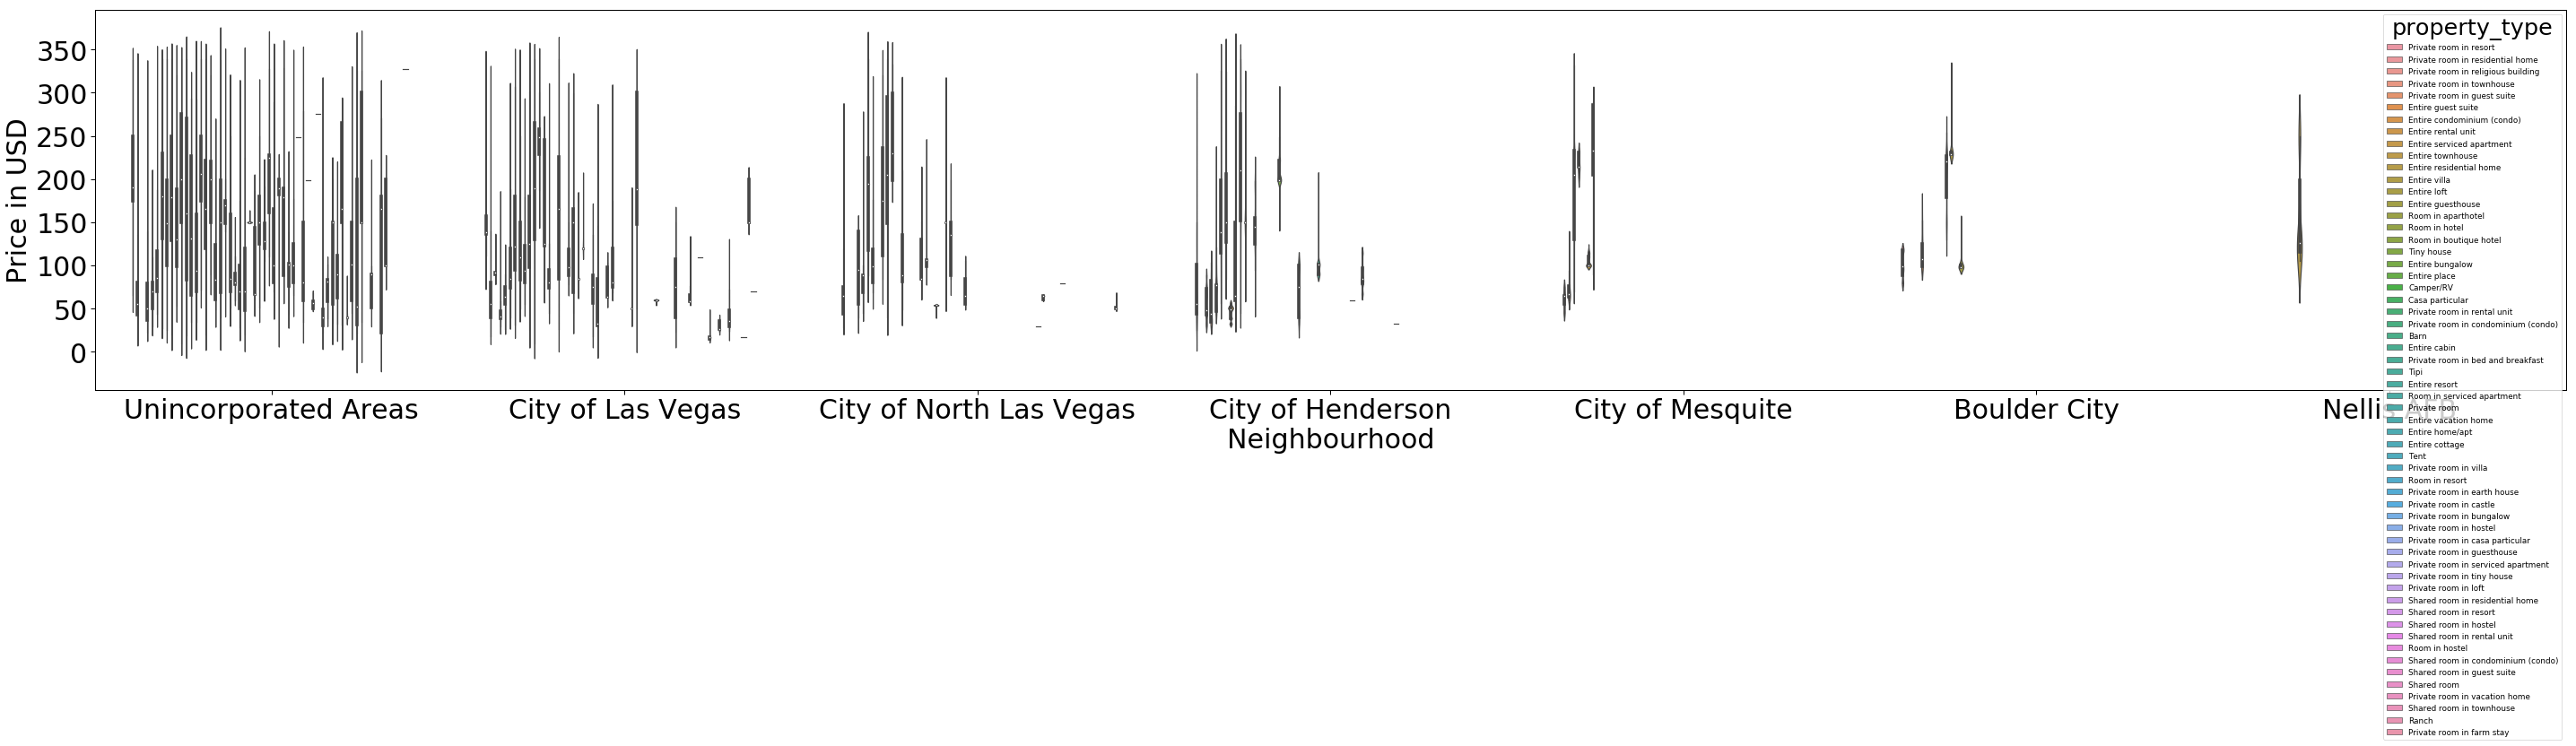

In [21]:
plt.figure(figsize=(40,10))
less_mean_df = combined_availa_T_df[combined_availa_T_df["price_US_dollars"] <= combined_availa_T_df["price_US_dollars"].mean()]
sort_bath = less_mean_df.sort_values('bathrooms_text')
ax = sns.violinplot(y="price_US_dollars", x="neighbourhood_cleansed", hue='property_type', data=sort_bath)

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.tight_layout()
plt.savefig('Fig_6.png', bbox_inches='tight')
plt.show()

## Figure 7

/Users/nn34/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


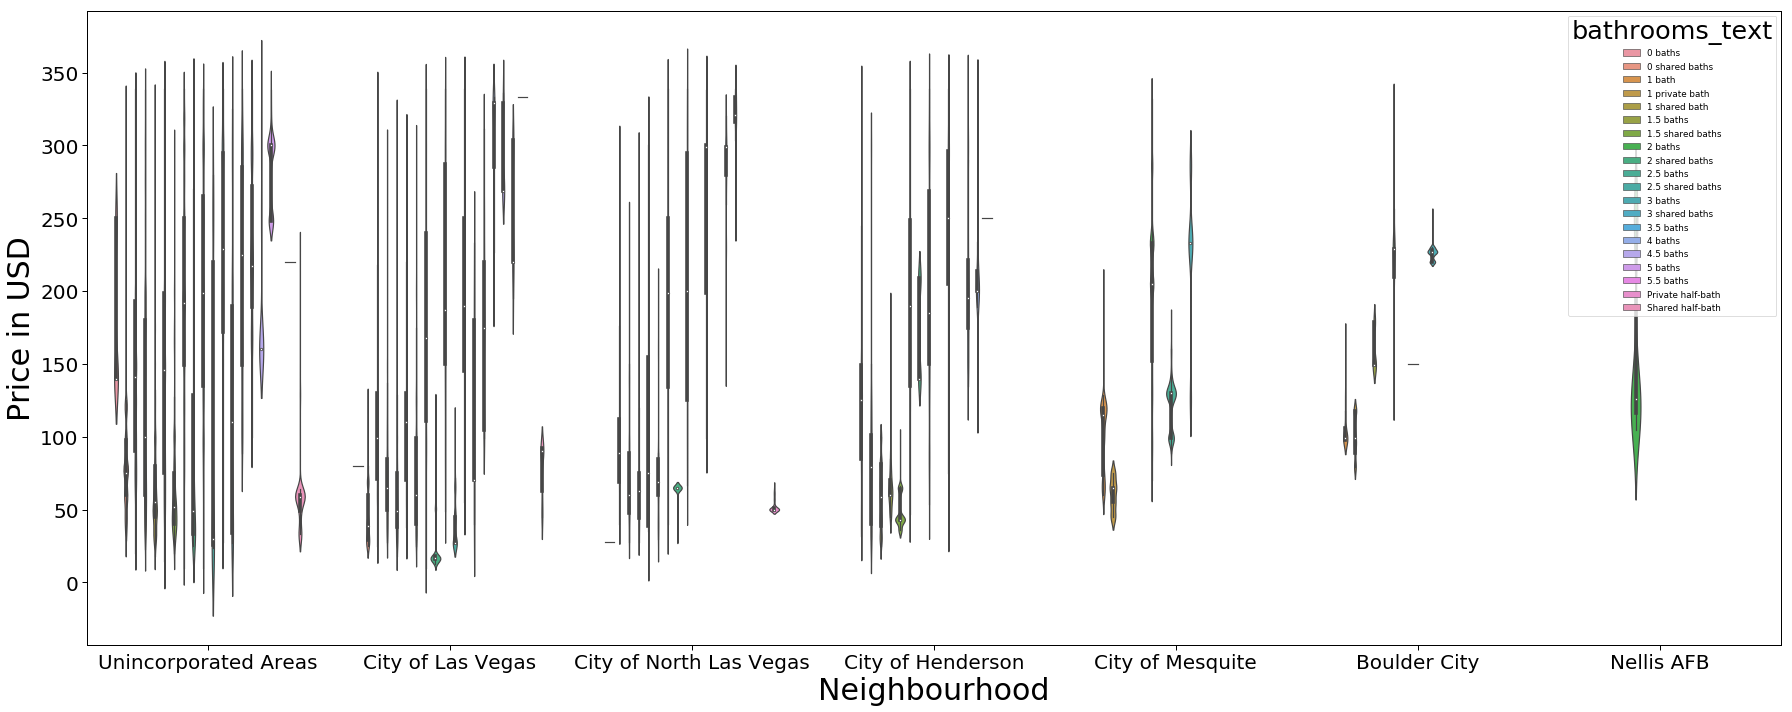

In [22]:

plt.figure(figsize=(25,10))
# less_mean_df = combined_availa_T_df[combined_availa_T_df["price_reformat"] <= combined_availa_T_df["price_reformat"].mean()]
# sort_bath = less_mean_df.sort_values('bathrooms_text')
ax = sns.violinplot(y="price_US_dollars", x='neighbourhood_cleansed',hue="bathrooms_text", data=sort_bath)

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
#plt.savefig('Fig_7.png', bbox_inches='tight')
plt.show()

In [23]:
# plt.figure(figsize=(20,10))
# # less_mean_df = combined_availa_T_df[combined_availa_T_df["price_US_dollars"] <= combined_availa_T_df["price_US_dollars"].mean()]
# # sort_bath = less_mean_df.sort_values('bathrooms_text')
# ax = sns.violinplot(x="price_US_dollars", y="property_type", hue='room_type', data=sort_bath)

In [24]:
# df_zero_count = (combined_availa_T_df[combined_availa_T_df["price_US_dollars"]==0]).groupby(['neighbourhood_cleansed']).count()
# df_zero_count

In [25]:
# plt.figure(figsize=(25,5))
# #fig, axes = plt.subplots(1,12, figsize=(12,60))
# #less_mean_df = calander_neighborhood_df[calander_neighborhood_df["price_reformat"] <= calander_neighborhood_df["price_reformat"].mean()]
# less_mean_df = less_mean_df.sort_values('month_year')
# less_mean_df['month_year'] = [str(x) for x in less_mean_df['month_year']]
# sns.violinplot(x="month_year", y="price_US_dollars", hue="neighbourhood_cleansed", data=less_mean_df)

## Figure 8

/Users/nn34/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/nn34/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


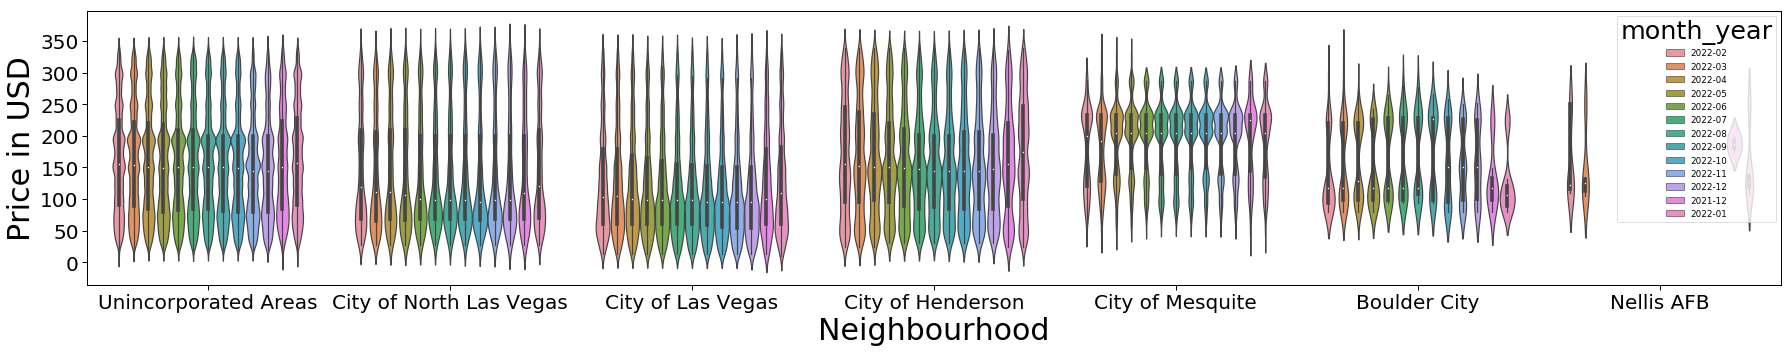

In [26]:
plt.figure(figsize=(25,5))
#fig, axes = plt.subplots(1,12, figsize=(12,60))
#less_mean_df = calander_neighborhood_df[calander_neighborhood_df["price_reformat"] <= calander_neighborhood_df["price_reformat"].mean()]
less_mean_df['month_year'] = [str(x) for x in less_mean_df['month_year']]
ax = sns.violinplot(x="neighbourhood_cleansed", y="price_US_dollars", hue="month_year", data=less_mean_df)

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
#plt.savefig('Fig_8.png', bbox_inches='tight')
plt.show()

## Figure 9

/Users/nn34/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


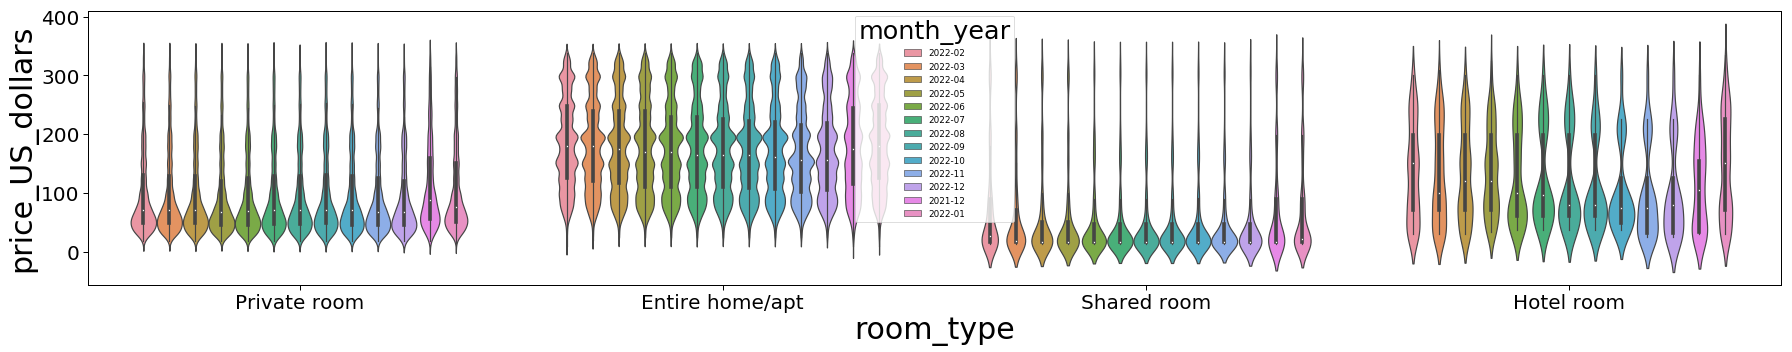

In [27]:
plt.figure(figsize=(25,5))
sns.violinplot(x="room_type", y="price_US_dollars", hue="month_year", data=less_mean_df)

ax.set_xlabel("Room type")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.savefig('Fig_9.png', bbox_inches='tight')
plt.show()

## Summary

Figure 1 implies there are null values in the listing CSV file whereas Figure shows that calendar CSV file features are complete. In Figure 3 violin plots shows the price range variance is highest in the 'Unincorporated Areas' in the Nevada Clark county and 'City of North Las Vegas' and  'City of Las Vegas' show similar variance. The lowest is in the 'Nellis AFB'.
The mean price is $339.52 and uses values less than that for the analysis below.

Figure 4 shows the median price highest for the 'city of Mesquite' and the lowest for the 'Boulder city'.

Figure 5 shows 'Unincorporated Areas'  and 'City of Las Vegas' includes the most diversity in terms of 'room types'. However, 'Unincorporated Areas' includes a higher number compared to 'City of Las Vegas. All other areas include only either 'private room' or 'Entire home/apt'. However 'Nellis AFB' includes only 'Entire home/apt'.

Figure 6 shows in terms of 'property types' the 'Unincorporated Areas'  and 'City of Las Vegas provide more options.

Figure 8 shows how price changes in all 12 months for different areas. The price shows the 'Boulder city' and 'city of Mesquit' median prices lowers in December and January, whereas in other areas median prices go up. The 'Nellis AFB' only had rental properties for a few months at the beginning of the year.


__Answers:__  
    a) Figure 9 shows the median price increases as 'shared rooms' < 'private rooms' < 'Hotel rooms' < 'Entire home/apt'. The 'shared rooms' median price does not change much throughout the year. The high median price change can be seen in the 'hotel rooms' depending on the month.  
      
   b) The median price depending on the areas in Clark county, the 'City of Las Vegas' and 'City of North Las Vegas' show the lower median price as In Figure 4. However, the lowest median price is shown in 'City of Las Vegas'.   
      
   C)As shown in Figure 8, the median price shows a decrease then followed by an increase for 'City of Las Vegas'. The lowest median housing price is shown in May.  